# Kerasによるニューラルネット実装例(MNIST)

In [13]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [30]:
# 自分で設定するパラメータ

# バッチサイズ
batch_size = 500

# エポック数
epochs = 20

In [31]:
# データ抽出
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [37]:
# モデルの構築
model = Sequential()

# 最初の隠れ層(入力784 -> 出力150)
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

# 2つ目の隠れ層(入力150 -> 出力2)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))

# model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.2))

# 出力層(入力5 -> 出力10)
model.add(Dense(10, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(),
              optimizer='adam',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 20)                10260     
_________________________________________________________________
dropout_26 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                210       
Total params: 412,390
Trainable params: 412,390
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s - loss: 0.6691 - acc: 0.7

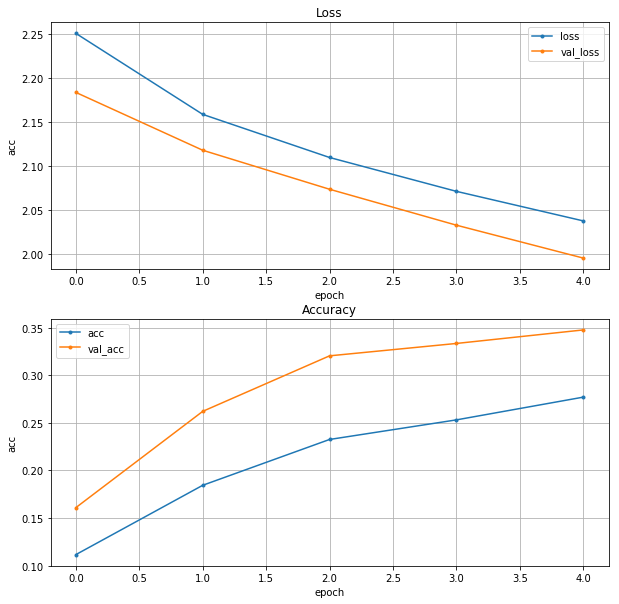

In [18]:
# 学習の様子をプロット
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [ ]:
import h5py
print(h5py)
# 学習モデルの保存
model.save("mnist_data.h5")

# モデルのテスト

In [19]:
# 画像の読み込み
from PIL import Image
import numpy as np


#画像の読み込み
im = Image.open("./tegaki3.jpg")

In [20]:
# 画像を白黒に変換
gray_img = im.convert('L')

# 画像の解像度を変換
gray_img = gray_img.resize((28,28))

#画像をarrayに変換
im_list = np.array(gray_img, 'f')

### 入力画像によって変更

In [21]:
##白地に黒文字の場合は実行
##白黒反転をし，正規化
im_list = 1 - im_list/255.

##黒地に白文字の場合は実行
##正規化
#im_list = im_list/255.

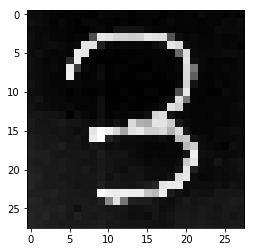

In [22]:
#入力画像の表示
plt.imshow(im_list,cmap=plt.get_cmap('gray'))

In [23]:
# 保存したモデルを読み込む場合は実行
# model = keras.models.load_model('./mnist_data.h5')

# 画像判別
test = im_list.reshape(1,784)
print(model.predict(test))
print('\n')
print('Result:',np.argmax(model.predict(test)[0]))

[[ 0.06390408  0.06434173  0.14396524  0.16597803  0.12351585  0.08371444
   0.17210107  0.07590342  0.06273805  0.04383802]]


Result: 6
